# Análisis Exploratorio (EDA) del Modelo de Regresión Logística

## 1. Carga de Datos y Preprocesamiento
El conjunto de datos utilizado proviene del archivo `marketing_campaign_corrected.csv`. En el preprocesamiento se realizaron las siguientes acciones:

- **Eliminación de valores nulos**: Se eliminaron todas las filas con valores nulos para evitar afectar la calidad del modelo.
- **Limpieza de nombres de columnas**: Se eliminaron espacios extra en los nombres de las columnas para garantizar consistencia.
- **Codificación de variables categóricas**: Las variables categóricas como `Education`, `Marital_Status`, y `Dt_Customer` fueron transformadas a variables numéricas mediante el uso de `LabelEncoder` para poder ser utilizadas por el modelo de regresión logística.

## 2. Variable Objetivo: `Response`
La variable objetivo `Response` es binaria, donde se asigna un valor de `1` si el cliente aceptó la última campaña y un valor de `0` si no la aceptó. Este es el objetivo que se intenta predecir utilizando las demás variables predictoras del conjunto de datos.

## 3. Preprocesamiento de Variables Predictoras
Al igual que en el Árbol de Decisión existe la posibilidad de eliminar las campañas para predecir solo con los datos del resto de caracteristicas

- Se eliminaron las columnas irrelevantes como `ID` y las variables de las campañas anteriores (`AcceptedCmp1`, `AcceptedCmp2`, etc.).
- Se estandarizaron las variables predictoras con `StandardScaler` para asegurar que todas las características tengan una escala similar y mejorar la precisión del modelo.

## 4. Creación del Modelo de Regresión Logística
Se ha entrenado un modelo de regresión logística utilizando `LogisticRegression` de `sklearn`. La variable objetivo (`Response`) se ha predicho en base a las variables predictoras preprocesadas.

## 5. Evaluación del Modelo
El modelo de regresión logística fue evaluado utilizando las siguientes métricas:

### **Accuracy**
La precisión del modelo, es decir, el porcentaje de predicciones correctas respecto al total de predicciones, fue de **0.876**, lo que indica que el modelo tiene un rendimiento bastante bueno en términos de clasificación binaria.

Accuracy: 0.876

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       382
           1       0.59      0.35      0.44        62

    accuracy                           0.88       444
    macro avg       0.75      0.66      0.69       444
    weighted avg       0.86      0.88      0.86       444

Accuracy: 0.876
Confusion Matrix:
[[367  15]
 [ 40  22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       382
           1       0.59      0.35      0.44        62

    accuracy                           0.88       444
   macro avg       0.75      0.66      0.69       444
weighted avg       0.86      0.88      0.86       444



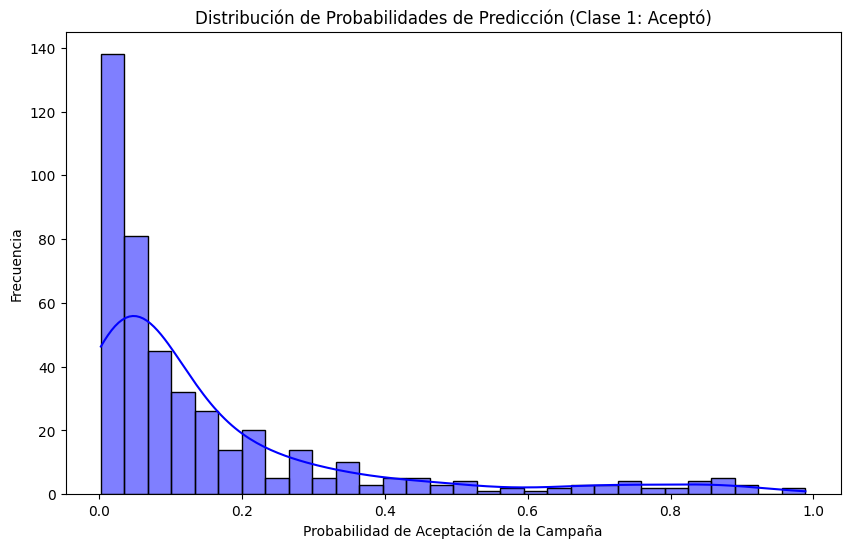

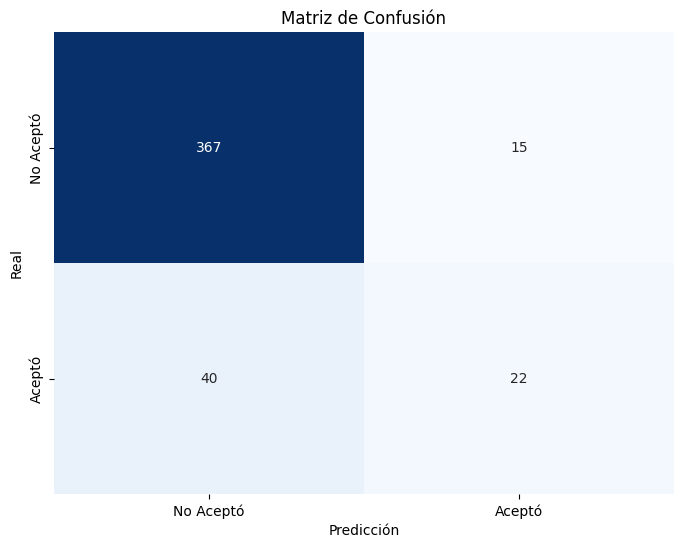

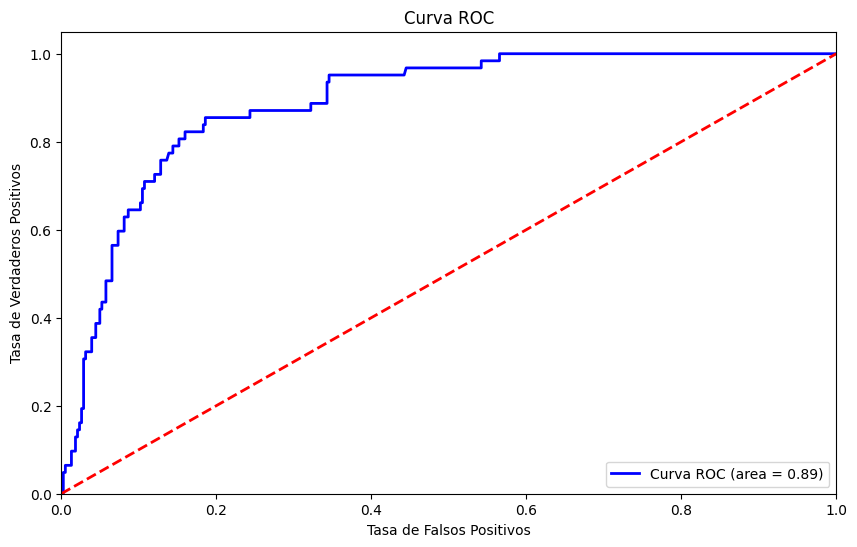

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Cargar el dataset corregido
df = pd.read_csv("marketing_campaign_corrected.csv")

# Eliminar valores nulos
df = df.dropna()

# Eliminar espacios en los nombres de columnas
df.columns = df.columns.str.strip()

# Eliminar las columnas 'ID' y las relacionadas con las campañas aceptadas, excepto la columna 'Response'
# cols_to_drop = ['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cols_to_drop = ['ID']
df = df.drop(columns=cols_to_drop)

# Codificación de variables categóricas
categorical_cols = ['Education', 'Marital_Status', 'Dt_Customer']
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Definir las variables predictoras y la variable objetivo
X = df.drop(columns=['Response'])
y = df['Response']

# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Predicción
y_pred = log_reg_model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.3f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Visualización de las probabilidades de predicción
y_pred_prob = log_reg_model.predict_proba(X_test)[:, 1]

# Graficar las probabilidades de predicción para la clase 1 (Aceptó la campaña)
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_prob, kde=True, color='blue', bins=30)
plt.title('Distribución de Probabilidades de Predicción (Clase 1: Aceptó)')
plt.xlabel('Probabilidad de Aceptación de la Campaña')
plt.ylabel('Frecuencia')
plt.show()

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.xticks(ticks=[0.5, 1.5], labels=['No Aceptó', 'Aceptó'])
plt.yticks(ticks=[0.5, 1.5], labels=['No Aceptó', 'Aceptó'])
plt.show()

# Graficar la curva ROC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
